In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!


True

In [ ]:
from nltk.corpus import movie_reviews

In [ ]:
movie_reviews.words()

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [ ]:
nltk.FreqDist(movie_reviews.words()).most_common(15)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822),
 ('s', 18513),
 ('"', 17612),
 ('it', 16107),
 ('that', 15924),
 ('-', 15595)]

# Convert to DataFrame

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
reviews = []
for fileid in movie_reviews.fileids():
    tag, filename = fileid.split('/')
    reviews.append((filename, tag, movie_reviews.raw(fileid)))

In [ ]:
data = pd.DataFrame(reviews, columns=['Filename', 'Target', 'Review'])
data.head()

,Filename,Target,Review
0,cv000_29416.txt,neg,"plot : two teen couples go to a church party ,..."
1,cv001_19502.txt,neg,the happy bastard's quick movie review \ndamn ...
2,cv002_17424.txt,neg,it is movies like these that make a jaded movi...
3,cv003_12683.txt,neg,""" quest for camelot "" is warner bros . ' firs..."
4,cv004_12641.txt,neg,synopsis : a mentally unstable man undergoing ...


# EDA

In [ ]:
data.shape

(2000, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  2000 non-null   object
 1   Target    2000 non-null   object
 2   Review    2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


Text(0.5, 1.0, 'Positive vs. Negative')

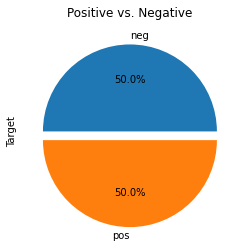

In [ ]:
data['Target'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%').set_title('Positive vs. Negative')

In [ ]:
data['Word count'] = [len(i) for i in data.Review]
data.head()

,Filename,Target,Review,Word count
0,cv000_29416.txt,neg,"plot : two teen couples go to a church party ,...",4043
1,cv001_19502.txt,neg,the happy bastard's quick movie review \ndamn ...,1370
2,cv002_17424.txt,neg,it is movies like these that make a jaded movi...,2848
3,cv003_12683.txt,neg,""" quest for camelot "" is warner bros . ' firs...",2929
4,cv004_12641.txt,neg,synopsis : a mentally unstable man undergoing ...,4418


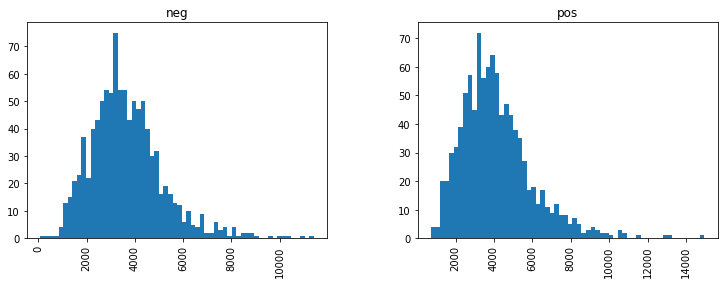

In [ ]:
data.hist(column='Word count',by='Target',bins=60,figsize=(12,4));
#plt.xlim(-40,950);

# PRE-PROCESSING

In [ ]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import nltk.stem
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
from string import punctuation

In [ ]:
'''Checks for punctuations and stopwords, performs tokenization, POS tagging and lemmatization and also removes irrelevant data''' 

def transformed_data(text): 
    stop_words = set(stopwords.words("english"))
    #List of custom stop words
    new_words = ["film", "movie", "character", "one", "make", "scene", "plot", "play", "story", "see", "view", "get", "take", "give","``", "-"]
    stop_words = stop_words.union(new_words)

    tokens = word_tokenize(text)
    cleaned_tokens = []

    for tok, tag in pos_tag(tokens):
        tok = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\)]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', tok)
        tok = re.sub("(@[A-Za-z0-9_]+)","", tok)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        tok = lemmatizer.lemmatize(tok, pos)

        if len(tok) > 0 and tok not in punctuation and tok.lower() not in stop_words:
            cleaned_tokens.append(tok.lower())
    return cleaned_tokens

In [ ]:
data['Transformed_data'] = [' '.join(transformed_data(i)) for i in data.Review]

In [ ]:
data['Transformed_data'][0]

"two teen couple go church party drink drive get accident guy die girlfriend continue see life nightmare 's deal watch `` sorta `` find critique mind-fuck teen generation touch cool idea present bad package review even hard write since generally applaud attempt break mold mess head lose highway memento good bad way type folk n't snag correctly seem take pretty neat concept execute terribly problem well main problem 's simply jumble start `` normal `` downshifts `` fantasy `` world audience member idea 's go dream come back dead others look like dead strange apparition disappearance looooot chase ton weird thing happen simply explain personally n't mind try unravel every give clue get kind feed 's big problem 's obviously get big secret hide seem want hide completely final five minute thing entertain thrill even engage meantime really sad part arrow dig flick like actually figure half-way point strangeness start little bit sense still n't entertaining guess bottom line like always sure 

# WORDCLOUDS

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
'''Plots wordcloud for any list of data'''

def Word_Cloud(df, cloud_title):
    comment_words = ""
    stopwords = set(STOPWORDS)
    
    for val in df:
        comment_words += " ".join(val)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    plt.figure(figsize = (4,4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(cloud_title)
    plt.show()

In [ ]:
negative = list( data.Review[data['Target'] == 'neg'] )
negative_clean = [transformed_data(i) for i in negative]

positive = list( data.Review[data['Target'] == 'pos'] )
positive_clean = [transformed_data(i) for i in positive]

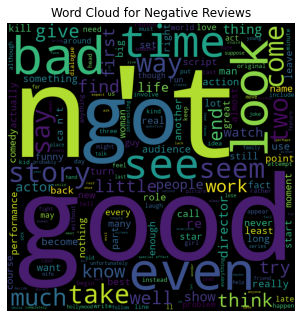

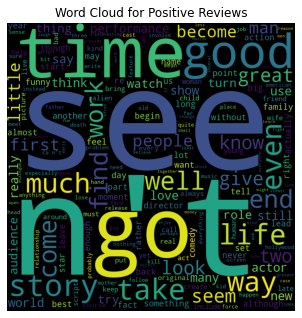

In [ ]:
Word_Cloud(negative_clean, 'Word Cloud for Negative Reviews')
Word_Cloud(positive_clean, 'Word Cloud for Positive Reviews')

# TOP 15 WORDS

In [ ]:
from collections import Counter

In [ ]:
neg_list = [item for i in negative_clean for item in i]
pos_list = [item for i in positive_clean for item in i]

In [ ]:
len(neg_list), len(pos_list)

(334067, 373316)

In [ ]:
c_negative  = Counter(neg_list)
c_positive = Counter(pos_list)
top30_negative = pd.DataFrame(c_negative.most_common(30),  columns=['word', 'count'])
top30_positive = pd.DataFrame(c_positive.most_common(30), columns=['word', 'count'])

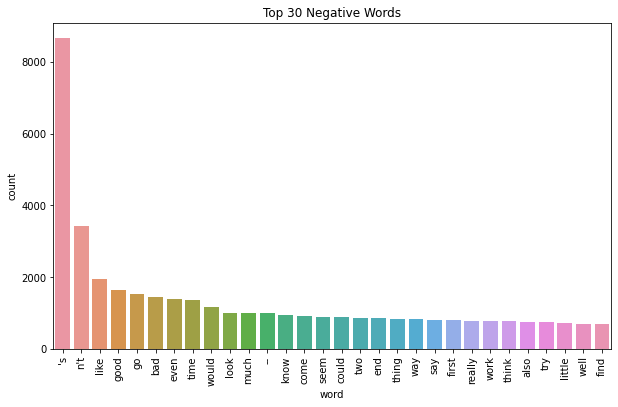

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=top30_negative, ax=ax)
plt.title("Top 30 Negative Words")
plt.xticks(rotation='vertical');

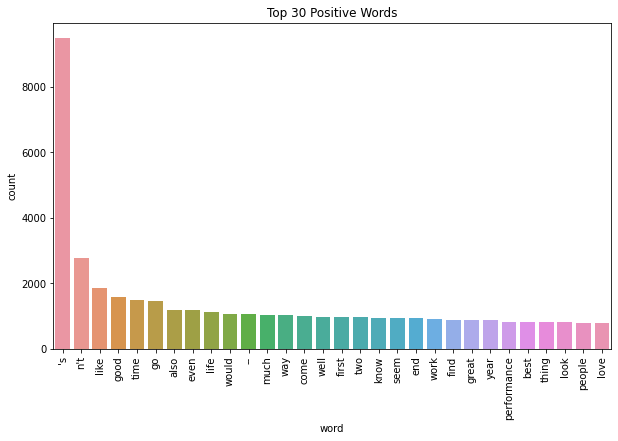

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=top30_positive, ax=ax)
plt.title("Top 30 Positive Words")
plt.xticks(rotation='vertical');

# TF-IDF VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data.Transformed_data)
print(type(vector))
X = vector.toarray()
print(X)
Y= data['Target']

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# CLASSIFICATION MODELS

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1600, 33141) (400, 33141) (1600,) (400,)


### Naive-Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train,Y_train)
pred_naive = naive.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_naive)}')

Accuracy : 0.81


### K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred_knn = knn.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_knn)}')

Accuracy : 0.6575


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
pred_log = log_reg.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_log)}')

Accuracy : 0.845


### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train,Y_train)
pred_svm = svm.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_svm)}')

Accuracy : 0.825


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
pred_dtc = dtc.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_dtc)}')

Accuracy : 0.635


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
pred_rfc = rfc.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_rfc)}')

Accuracy : 0.7875


### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)
pred_ada = ada.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_ada)}')

Accuracy : 0.7425


### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
gbc = GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
pred_gbc = gbc.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_gbc)}')

Accuracy : 0.7875


### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
pred_xgb = xgb.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, pred_xgb)}')

Accuracy : 0.7825


# METRICS

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
model_pred = {'Naive Bayes' : pred_naive, 'KNN' : pred_knn, 'Logistic Regression' : pred_log, 'SVM' : pred_svm, 'Decision Tree Classifier' : pred_dtc, 'Random Forest Classifier' : pred_rfc, 'AdaBoost Classifier' : pred_ada, 'Gradient Boosting Classifier' : pred_gbc, 'XGBoost Classifier' : pred_xgb}

In [ ]:
for v,k in model_pred.items():
    print(f'{v} :\n{confusion_matrix(Y_test, model_pred[v])}')
    print("\n-----------------------------------------\n")

Naive Bayes :
[[169  36]
 [ 40 155]]

-----------------------------------------

KNN :
[[130  75]
 [ 62 133]]

-----------------------------------------

Logistic Regression :
[[168  37]
 [ 25 170]]

-----------------------------------------

SVM :
[[165  40]
 [ 30 165]]

-----------------------------------------

Decision Tree Classifier :
[[126  79]
 [ 67 128]]

-----------------------------------------

Random Forest Classifier :
[[180  25]
 [ 60 135]]

-----------------------------------------

AdaBoost Classifier :
[[145  60]
 [ 43 152]]

-----------------------------------------

Gradient Boosting Classifier :
[[154  51]
 [ 34 161]]

-----------------------------------------

XGBoost Classifier :
[[154  51]
 [ 36 159]]

-----------------------------------------



In [ ]:
for v,k in model_pred.items():
    print(f'{v} :\n{classification_report(Y_test, model_pred[v])}')
    print("\n------------------------------------------------------------------------------\n")

Naive Bayes :
              precision    recall  f1-score   support

         neg       0.81      0.82      0.82       205
         pos       0.81      0.79      0.80       195

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400


------------------------------------------------------------------------------

KNN :
              precision    recall  f1-score   support

         neg       0.68      0.63      0.65       205
         pos       0.64      0.68      0.66       195

    accuracy                           0.66       400
   macro avg       0.66      0.66      0.66       400
weighted avg       0.66      0.66      0.66       400


------------------------------------------------------------------------------

Logistic Regression :
              precision    recall  f1-score   support

         neg       0.87      0.82      0.84       205
         pos       0.82      0.87

In [ ]:
roc_auc_score(Y_test, svm.predict_proba(X_test)[:, 1])

0.9116197623514697

In [ ]:
accuracy = [[accuracy_score(Y_test, pred_naive), roc_auc_score(Y_test, naive.predict_proba(X_test)[:, 1]), f1_score(Y_test, pred_naive, pos_label="pos")], 
            [accuracy_score(Y_test, pred_knn), roc_auc_score(Y_test, knn.predict_proba(X_test)[:, 1]), f1_score(Y_test, pred_knn, pos_label="pos")], 
            [accuracy_score(Y_test, pred_log), roc_auc_score(Y_test, log_reg.predict_proba(X_test)[:, 1]), f1_score(Y_test, pred_log, pos_label="pos")], 
            [accuracy_score(Y_test, pred_svm), roc_auc_score(Y_test, svm.predict_proba(X_test)[:, 1]), f1_score(Y_test, pred_svm, pos_label="pos")], 
            [accuracy_score(Y_test, pred_dtc), roc_auc_score(Y_test, dtc.predict_proba(X_test)[:, 1]), f1_score(Y_test, pred_dtc, pos_label="pos")], 
            [accuracy_score(Y_test, pred_rfc), roc_auc_score(Y_test, rfc.predict_proba(X_test)[:, 1]), f1_score(Y_test, pred_rfc, pos_label="pos")],
            [accuracy_score(Y_test, pred_ada), roc_auc_score(Y_test, ada.predict_proba(X_test)[:, 1]), f1_score(Y_test, pred_ada, pos_label="pos")],
            [accuracy_score(Y_test, pred_gbc), roc_auc_score(Y_test, gbc.predict_proba(X_test)[:, 1]), f1_score(Y_test, pred_gbc, pos_label="pos")],
            [accuracy_score(Y_test, pred_xgb), roc_auc_score(Y_test, xgb.predict_proba(X_test)[:, 1]), f1_score(Y_test, pred_xgb, pos_label="pos")]]

pd.DataFrame(accuracy, columns = ['Prediction Accuracy', 'ROC-AUC Score', 'F1 Score'],
             index = ['Naive Bayes Classification', 'K-Nearest Neighbour', 'Logistic Regression', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'XGBoost Classifier'])

,Prediction Accuracy,ROC-AUC Score,F1 Score
Naive Bayes Classification,0.8100,0.893483,0.803109
K-Nearest Neighbour,0.6575,0.705116,0.660050
Logistic Regression,0.8450,0.917674,0.845771
Support Vector Machine,0.8250,0.911620,0.825000
Decision Tree Classifier,0.6350,0.635522,0.636816
Random Forest Classifier,0.7875,0.871282,0.760563
AdaBoost Classifier,0.7425,0.832145,0.746929
Gradient Boosting Classifier,0.7875,0.860313,0.791155
XGBoost Classifier,0.7825,0.867792,0.785185


Out of all the Models implemented above, Naive Bayes, Logistic Regression and Support Vector Machine(SVM) perform best, with Logistic Regression having a highest accuracy of 84.5% and F1 score of 0.84, followed by SVM and then finally Naive Bayes. The final performance metric used to compare models is F1 score.